In [32]:
from sklearn.manifold import TSNE
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from umap import UMAP
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


In [3]:
data: pd.DataFrame = pd.read_csv('zoo.csv')
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,vespa,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6
109,bicho-pau,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,7
110,caracol-da-mata-atlantica,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
111,caranguejeira,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,7


In [4]:
D = data.drop(['class_type', 'animal_name'], axis=1)

In [5]:
scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(D), columns=D.columns)
D

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.50,1.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
109,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.75,0.0,0.0,0.0
110,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0
111,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.00,0.0,0.0,0.0


In [55]:
from functools import wraps
import time


def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__}{args} {kwargs} Took {total_time:.4f} seconds')
    return timeit_wrapper


In [60]:
# T = TSNE(n_components=2, perplexity=25, random_state=123)
# TSNE_features = T.fit_transform(D)

perplexities =  [5, 25, 50]
indexes = [i + 1 for i in range(len(perplexities))]
@timeit
def get_tsne_features(perplexities):
     return [TSNE(n_components=2, perplexity=i, random_state=123).fit_transform(D)
                for i in perplexities]

TSNE_features = get_tsne_features(perplexities)


d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\projects\pythonprojects\jupyter\venv\lib\site-packages\sklearn\manifold\_t_sne

Function get_tsne_features([5, 25, 50],) {} Took 1.3185 seconds


perplexity=5


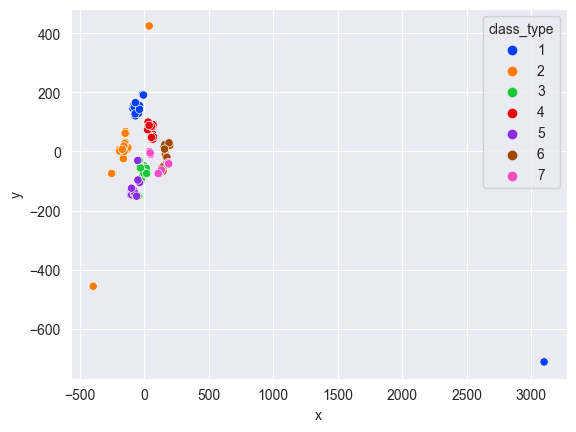

perplexity=25


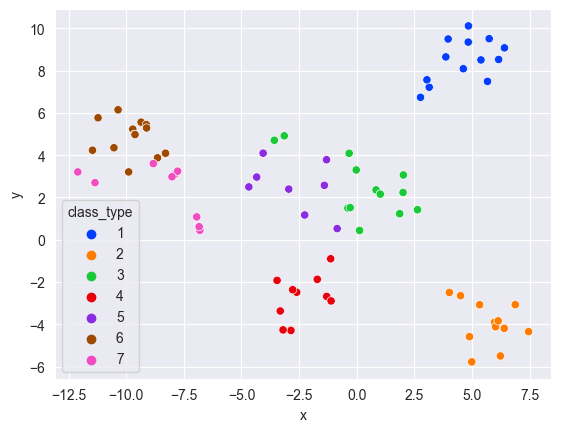

perplexity=50


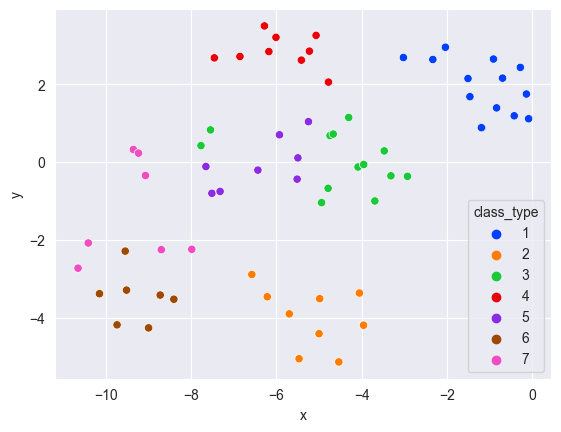

In [58]:
DATA = D.copy()

for i, perplexity, TSNE_feature in zip(indexes, perplexities, TSNE_features):
    DATA['x']=TSNE_feature[:, 0]
    DATA['y']=TSNE_feature[:, 1]
    fig = plt.figure()
    print(f"perplexity={perplexity}")
    sns.scatterplot(x='x', y='y', hue=data['class_type'], data=DATA, palette='bright')
    plt.show()


In [61]:
n_neighbors = (5, 25, 50)
min_dist = (0.1, 0.6)
DATA = D.copy()

@timeit
def get_umap_data(n_neighbors, min_dist, data):
    umap = {}
    for i in range(len(n_neighbors)):
        for j in range(len(min_dist)):
            umap[(n_neighbors[i],min_dist[j])]=(UMAP(n_neighbors=n_neighbors[i], min_dist=min_dist[j], random_state=123).fit_transform(data))
    return umap

um = get_umap_data(n_neighbors, min_dist, DATA)


Function get_umap_data((5, 25, 50), (0.1, 0.6),      hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0     0.0       0.0   1.0   0.0       0.0      1.0       0.0      0.0   
1     0.0       0.0   1.0   0.0       0.0      0.0       0.0      1.0   
2     0.0       0.0   1.0   0.0       0.0      0.0       1.0      1.0   
3     0.0       0.0   1.0   0.0       0.0      0.0       1.0      1.0   
4     0.0       0.0   1.0   0.0       0.0      0.0       0.0      1.0   
..    ...       ...   ...   ...       ...      ...       ...      ...   
108   0.0       0.0   1.0   0.0       1.0      0.0       1.0      0.0   
109   0.0       0.0   1.0   0.0       0.0      0.0       0.0      0.0   
110   0.0       0.0   1.0   0.0       0.0      0.0       0.0      0.0   
111   1.0       0.0   1.0   0.0       0.0      0.0       1.0      0.0   
112   1.0       0.0   1.0   0.0       0.0      0.0       1.0      0.0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0 

n_neighbors=5, min_dist=0.1


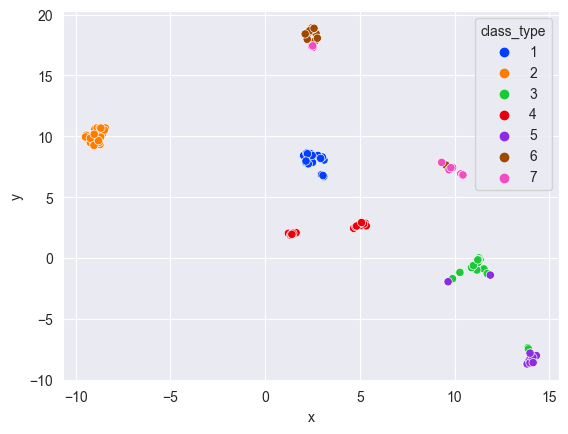

n_neighbors=5, min_dist=0.6


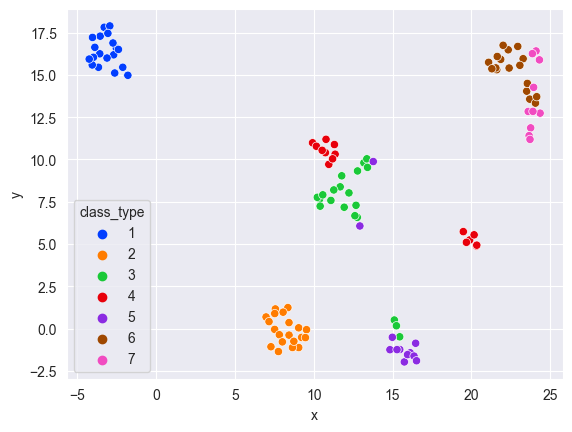

n_neighbors=25, min_dist=0.1


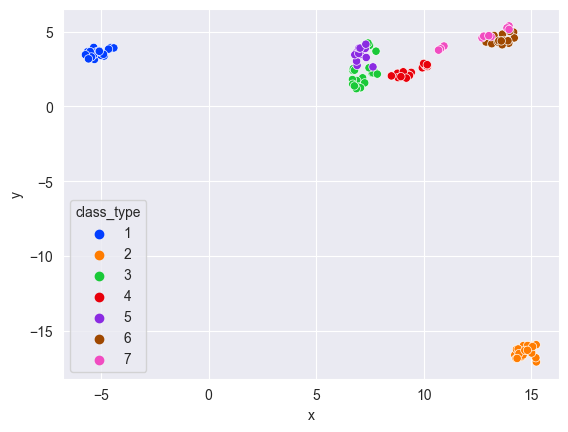

n_neighbors=25, min_dist=0.6


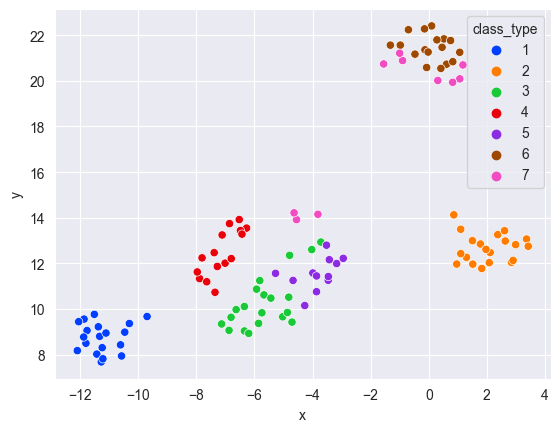

n_neighbors=50, min_dist=0.1


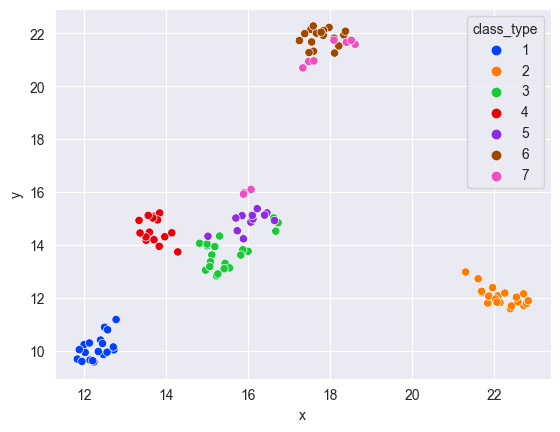

n_neighbors=50, min_dist=0.6


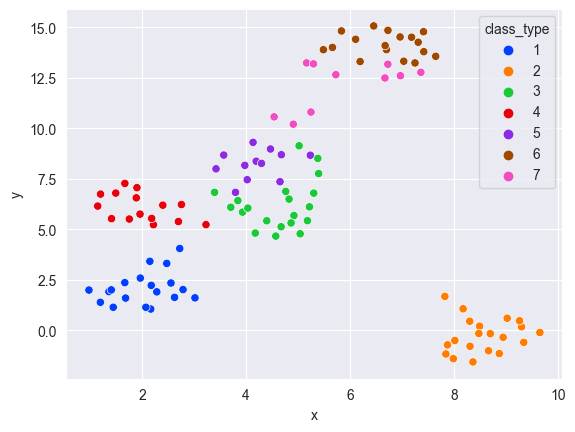

In [62]:
# fig = plt.figure()
# sns.scatterplot(hue=data['class_type'], data=], palette='bright')
# plt.show()
# um[(5, 0.1)]
d = [(5, 0.1), (5, 0.6), (25, 0.1), (25, 0.6), (50, 0.1), (50, 0.6)]
for frame in d:
    DATA['x']=um[frame][:, 0]
    DATA['y']=um[frame][:, 1]
    fig = plt.figure()
    print(f"n_neighbors={frame[0]}, min_dist={frame[1]}")
    sns.scatterplot(x='x', y='y', hue=data['class_type'], data=DATA, palette='bright')
    plt.show()

